In [1]:
"""
Created on Saturday Januyaray 04, 2025

@author: AFTAB HASSAN

"""
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning) # setting ignore as a parameter and further adding category
warnings.simplefilter('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Setup and Import data
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

In [2]:
output=[]
temp_output=[]
# Load Data 

df = pd.read_csv('input/data_forecast.csv')
col=['ALL_DATE','Region','SKU','Type','QTY']
df.columns=col
df["ALL_DATE"]=pd.to_datetime(df["ALL_DATE"],format="%d-%m-%Y")

In [3]:
result = adfuller(df['QTY'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -4.1517892314901506
n_lags: 0.0007942713949662274
p-value: 0.0007942713949662274
Critial Values:
   1%, -3.6461350877925254
Critial Values:
   5%, -2.954126991123355
Critial Values:
   10%, -2.6159676124885216


In [4]:
data=df.copy()

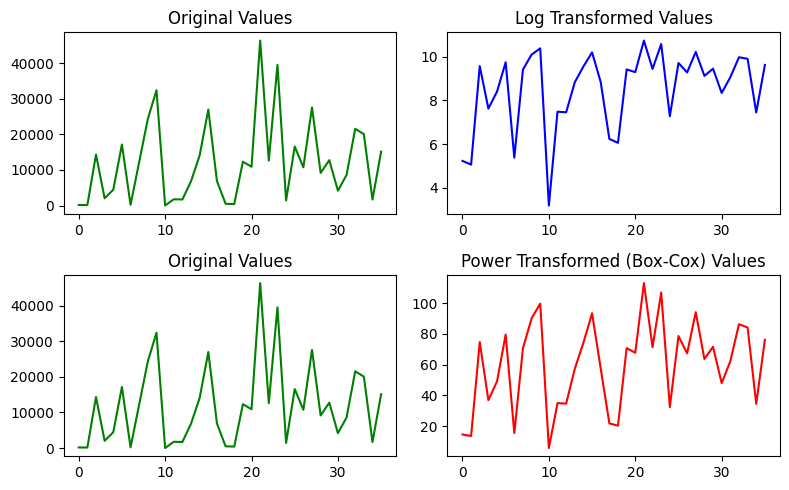

Best Lambda for Box-Cox Transformation: 0.3428957698289203


In [5]:
# Log Transformation
data["Log_QTY"] = np.log(data["QTY"] + 1)  # Adding 1 to handle zero values

# Power Transformation (Box-Cox)
data["BoxCox_QTY"], best_lambda = boxcox(data["QTY"] + 1)  # Box-Cox requires positive values

# Plot original vs transformed data
fig, axes = plt.subplots(2, 2, figsize=(8, 5))
# Original values
axes[0, 0].plot(data.index, data["QTY"], color='green')
axes[0, 0].set_title("Original Values")

# Log Transformed values
axes[0, 1].plot(data.index, data["Log_QTY"], color='blue')
axes[0, 1].set_title("Log Transformed Values")

# Original values
axes[1, 0].plot(data.index, data["QTY"], color='green')
axes[1, 0].set_title("Original Values")

# Box-Cox Transformed values
axes[1, 1].plot(data.index, data["BoxCox_QTY"], color='red')
axes[1, 1].set_title("Power Transformed (Box-Cox) Values")

plt.tight_layout()
plt.show()

# Print best lambda for Box-Cox
print(f"Best Lambda for Box-Cox Transformation: {best_lambda}")